In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

# Let's take a look at the case time series first

In [65]:
case = pd.read_csv(url_case, index_col=[0, 1, 2, 3])

In [66]:
case

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        2        3   
               Japan                  36.0000  138.0000        2        1   
               Singapore              1.2833   103.8333        0        1   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        5        7   
               Japan                  36.0000  138.0000        2        2   
               Singapore              1.2833   103.8333        3        3   
               Nepal                  28.1667  84.2500         0        1   
               Malaysia               2.5000   112.5000        0        3   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        8        8   
               Japan                  36.0000  138.0000        4        4   
               Singapore              1.2833   103.8333        4        5   
               Nepal                  28.1667  84.2500         1        1   
               Malaysia               2.5000   112.5000        4        4   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000       14       14   
               Japan                  36.0000  138.0000        7        7   
               Singapore              1.2833   103.8333        7        7   
               Nepal                  28.1667  84.2500         1        1   
               Malaysia               2.5000   112.5000        4        7   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

 # Below is  ideal dataframe structure in picture

![title](desired_format.png)

In [67]:
# Stack the dataframe so that each row represents one date in a location.
stacked = case.stack()
stacked

Province/State  Country/Region  Lat      Long           
NaN             Thailand        15.0000   101.0  1/22/20    2.0
                                                 1/23/20    3.0
                                                 1/24/20    5.0
                                                 1/25/20    7.0
                                                 1/26/20    8.0
                                                           ... 
                The Gambia      13.4667  -16.6   3/19/20    0.0
                                                 3/20/20    0.0
                                                 3/21/20    0.0
                                                 3/22/20    0.0
                                                 3/23/20    0.0
Length: 30870, dtype: float64

In [68]:
# reset the index
case=stacked.reset_index()
case

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [69]:
# Rename the columns.
case.columns = ['prov_state', 'country', 'lat', 'long', 'date', 'cum_case']
case

,prov_state,country,lat,long,date,cum_case
0,NaN,Thailand,15.0000,101.0,1/22/20,2.0
1,NaN,Thailand,15.0000,101.0,1/23/20,3.0
2,NaN,Thailand,15.0000,101.0,1/24/20,5.0
3,NaN,Thailand,15.0000,101.0,1/25/20,7.0
4,NaN,Thailand,15.0000,101.0,1/26/20,8.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [70]:
# Remove the rows where the cumulative number of cases is zero.

case=case.drop(case[case['cum_case']==0].index)
case

,prov_state,country,lat,long,date,cum_case
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Thailand,15.0000,101.0000,1/23/20,3.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8.0
...,...,...,...,...,...,...
30125,NaN,Reunion,-21.1151,55.5364,3/23/20,47.0
30187,NaN,French Guiana,3.9339,-53.1258,3/23/20,18.0
30249,NaN,Mayotte,-12.8275,45.1662,3/23/20,11.0
30311,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0


In [71]:
# Make a new column location to combine prov_state and country.
case.insert(0,'location', np.where((case.prov_state.isnull()), case.country, case.prov_state))
case

,location,prov_state,country,lat,long,date,cum_case
0,Thailand,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,Thailand,NaN,Thailand,15.0000,101.0000,1/23/20,3.0
2,Thailand,NaN,Thailand,15.0000,101.0000,1/24/20,5.0
3,Thailand,NaN,Thailand,15.0000,101.0000,1/25/20,7.0
4,Thailand,NaN,Thailand,15.0000,101.0000,1/26/20,8.0
...,...,...,...,...,...,...,...
30125,Reunion,NaN,Reunion,-21.1151,55.5364,3/23/20,47.0
30187,French Guiana,NaN,French Guiana,3.9339,-53.1258,3/23/20,18.0
30249,Mayotte,NaN,Mayotte,-12.8275,45.1662,3/23/20,11.0
30311,United States Virgin Islands,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0


In [72]:
# Make a new column new_case to derive the new case number from cumulative case number.
case['new_case']=case.groupby('location')['cum_case'].diff(1)
case

,location,prov_state,country,lat,long,date,cum_case,new_case
0,Thailand,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,NaN
1,Thailand,NaN,Thailand,15.0000,101.0000,1/23/20,3.0,1.0
2,Thailand,NaN,Thailand,15.0000,101.0000,1/24/20,5.0,2.0
3,Thailand,NaN,Thailand,15.0000,101.0000,1/25/20,7.0,2.0
4,Thailand,NaN,Thailand,15.0000,101.0000,1/26/20,8.0,1.0
...,...,...,...,...,...,...,...,...
30125,Reunion,NaN,Reunion,-21.1151,55.5364,3/23/20,47.0,0.0
30187,French Guiana,NaN,French Guiana,3.9339,-53.1258,3/23/20,18.0,0.0
30249,Mayotte,NaN,Mayotte,-12.8275,45.1662,3/23/20,11.0,0.0
30311,United States Virgin Islands,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0,NaN


In [73]:
# Convert the date column to datetime object.
case.date=case.date.astype('datetime64')
case

,location,prov_state,country,lat,long,date,cum_case,new_case
0,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,NaN
1,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-23,3.0,1.0
2,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-24,5.0,2.0
3,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-25,7.0,2.0
4,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-26,8.0,1.0
...,...,...,...,...,...,...,...,...
30125,Reunion,NaN,Reunion,-21.1151,55.5364,2020-03-23,47.0,0.0
30187,French Guiana,NaN,French Guiana,3.9339,-53.1258,2020-03-23,18.0,0.0
30249,Mayotte,NaN,Mayotte,-12.8275,45.1662,2020-03-23,11.0,0.0
30311,United States Virgin Islands,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,NaN


# Now Let's do exactly the same to  the death time series 

In [74]:
death = pd.read_csv(url_death, index_col=[0, 1, 2, 3])
death

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [75]:
death_stack = death.stack()
death

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [76]:
death=death_stack.reset_index()
death

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,0.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [77]:
death.columns = ['prov_state', 'country', 'lat', 'long', 'date', 'cum_death']
death

,prov_state,country,lat,long,date,cum_death
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,0.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [78]:
death=death.drop(death[death['cum_death']==0].index)
death

,prov_state,country,lat,long,date,cum_death
39,NaN,Thailand,15.0000,101.0000,3/1/20,1.0
40,NaN,Thailand,15.0000,101.0000,3/2/20,1.0
41,NaN,Thailand,15.0000,101.0000,3/3/20,1.0
42,NaN,Thailand,15.0000,101.0000,3/4/20,1.0
43,NaN,Thailand,15.0000,101.0000,3/5/20,1.0
...,...,...,...,...,...,...
28015,NaN,Mauritius,-20.2000,57.5000,3/21/20,1.0
28016,NaN,Mauritius,-20.2000,57.5000,3/22/20,1.0
28017,NaN,Mauritius,-20.2000,57.5000,3/23/20,1.0
30497,NaN,Guam,13.4443,144.7937,3/23/20,1.0


In [79]:
death.insert(0,'location', np.where((death.prov_state.isnull()), death.country, death.prov_state))
death

,location,prov_state,country,lat,long,date,cum_death
39,Thailand,NaN,Thailand,15.0000,101.0000,3/1/20,1.0
40,Thailand,NaN,Thailand,15.0000,101.0000,3/2/20,1.0
41,Thailand,NaN,Thailand,15.0000,101.0000,3/3/20,1.0
42,Thailand,NaN,Thailand,15.0000,101.0000,3/4/20,1.0
43,Thailand,NaN,Thailand,15.0000,101.0000,3/5/20,1.0
...,...,...,...,...,...,...,...
28015,Mauritius,NaN,Mauritius,-20.2000,57.5000,3/21/20,1.0
28016,Mauritius,NaN,Mauritius,-20.2000,57.5000,3/22/20,1.0
28017,Mauritius,NaN,Mauritius,-20.2000,57.5000,3/23/20,1.0
30497,Guam,NaN,Guam,13.4443,144.7937,3/23/20,1.0


In [80]:
# x=0
# death['new_death']=np.where(death.location[x]==death.location[x+1],death.cum_death.diff(periods=1),np.NaN)
# death
death['new_death'] = death.groupby('location')['cum_death'].diff(1)

In [81]:
death.new_death.unique()

array([ nan,   0.,   1.,   2.,   4.,   5.,   3.,   6.,   7.,  16.,  23.,
        17.,  10.,  -2.,  -1.,   8.,  18.,  27.,  28.,  41.,  49.,  36.,
       133.,  97., 168., 196., 439., 175., 368., 349., 345., 475., 427.,
       627., 793., 651.,  11.,  19.,  78.,  62.,  94.,  53., 191.,  90.,
       207., 213., 332., 397.,  30.,  13.,  21.,  -4.,  14.,   9.,  57.,
        12.,  24.,  37.,  42.,  45., 101.,  64.,  65.,  70.,  69.,  81.,
        91., 103., 242., 147., 139., 100.,  93., 132., 108., 115., 202.,
       149.,  68.,  52.,  26.,  34.,  32.,  31.,  29.,  22.,  15.,  43.,
        54.,  63.,  75.,  85., 113., 129., 135., 123.,  95., 112.,  66.,
        40.,  56.,  48.])

In [82]:
death.date=death.date.astype('datetime64')
death


,location,prov_state,country,lat,long,date,cum_death,new_death
39,Thailand,NaN,Thailand,15.0000,101.0000,2020-03-01,1.0,NaN
40,Thailand,NaN,Thailand,15.0000,101.0000,2020-03-02,1.0,0.0
41,Thailand,NaN,Thailand,15.0000,101.0000,2020-03-03,1.0,0.0
42,Thailand,NaN,Thailand,15.0000,101.0000,2020-03-04,1.0,0.0
43,Thailand,NaN,Thailand,15.0000,101.0000,2020-03-05,1.0,0.0
...,...,...,...,...,...,...,...,...
28015,Mauritius,NaN,Mauritius,-20.2000,57.5000,2020-03-21,1.0,NaN
28016,Mauritius,NaN,Mauritius,-20.2000,57.5000,2020-03-22,1.0,0.0
28017,Mauritius,NaN,Mauritius,-20.2000,57.5000,2020-03-23,1.0,0.0
30497,Guam,NaN,Guam,13.4443,144.7937,2020-03-23,1.0,0.0


# Now Let's also do exactly the same to  the cured time series 

In [83]:
cured = pd.read_csv(url_cured, index_col=[0, 1, 2, 3])
cured

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        2        2   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        5        5   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [84]:
cured_stack = cured.stack()
cured

1/22/20  1/23/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/24/20  1/25/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        0        0   
               Japan                  36.0000  138.0000        0        0   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/26/20  1/27/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        2        2   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                         1/28/20  1/29/20  \
Province/State Country/Region        Lat      Long                          
NaN            Thailand               15.0000  101.0000        5        5   
               Japan                  36.0000  138.0000        1        1   
               Singapore              1.2833   103.8333        0        0   
               Nepal                  28.1667  84.2500         0        0   
               Malaysia               2.5000   112.5000        0        0   
...                                                          ...      ...   
               Jersey                 49.1900 -2.1100          0        0   
               Puerto Rico            18.2000 -66.5000         0        0   
               Republic of the Congo -1.4400   15.5560         0        0   
               The Bahamas            24.2500 -76.0000         0        0   
               The Gambia             13.4667 -16.6000         0        0   

                                                 

In [85]:
cured=cured_stack.reset_index()
cured

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,2.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [86]:
cured.columns = ['prov_state', 'country', 'lat', 'long', 'date', 'cum_cured']
cured

,prov_state,country,lat,long,date,cum_cured
0,NaN,Thailand,15.0000,101.0,1/22/20,0.0
1,NaN,Thailand,15.0000,101.0,1/23/20,0.0
2,NaN,Thailand,15.0000,101.0,1/24/20,0.0
3,NaN,Thailand,15.0000,101.0,1/25/20,0.0
4,NaN,Thailand,15.0000,101.0,1/26/20,2.0
...,...,...,...,...,...,...
30865,NaN,The Gambia,13.4667,-16.6,3/19/20,0.0
30866,NaN,The Gambia,13.4667,-16.6,3/20/20,0.0
30867,NaN,The Gambia,13.4667,-16.6,3/21/20,0.0
30868,NaN,The Gambia,13.4667,-16.6,3/22/20,0.0


In [87]:
cured=cured.drop(cured[cured['cum_cured']==0].index)
cured

,prov_state,country,lat,long,date,cum_cured
4,NaN,Thailand,15.0000,101.0000,1/26/20,2.0
5,NaN,Thailand,15.0000,101.0000,1/27/20,2.0
6,NaN,Thailand,15.0000,101.0000,1/28/20,5.0
7,NaN,Thailand,15.0000,101.0000,1/29/20,5.0
8,NaN,Thailand,15.0000,101.0000,1/30/20,5.0
...,...,...,...,...,...,...
27148,Netherlands,Netherlands,52.1326,5.2913,3/21/20,2.0
27149,Netherlands,Netherlands,52.1326,5.2913,3/22/20,2.0
27150,Netherlands,Netherlands,52.1326,5.2913,3/23/20,2.0
30187,NaN,French Guiana,3.9339,-53.1258,3/23/20,6.0


In [88]:
cured.insert(0,'location', np.where((cured.prov_state.isnull()), cured.country, cured.prov_state))
cured

,location,prov_state,country,lat,long,date,cum_cured
4,Thailand,NaN,Thailand,15.0000,101.0000,1/26/20,2.0
5,Thailand,NaN,Thailand,15.0000,101.0000,1/27/20,2.0
6,Thailand,NaN,Thailand,15.0000,101.0000,1/28/20,5.0
7,Thailand,NaN,Thailand,15.0000,101.0000,1/29/20,5.0
8,Thailand,NaN,Thailand,15.0000,101.0000,1/30/20,5.0
...,...,...,...,...,...,...,...
27148,Netherlands,Netherlands,Netherlands,52.1326,5.2913,3/21/20,2.0
27149,Netherlands,Netherlands,Netherlands,52.1326,5.2913,3/22/20,2.0
27150,Netherlands,Netherlands,Netherlands,52.1326,5.2913,3/23/20,2.0
30187,French Guiana,NaN,French Guiana,3.9339,-53.1258,3/23/20,6.0


In [89]:
cured['new_cured'] = cured.groupby('location')['cum_cured'].diff(1)

In [90]:
cured.tail(40)

,location,prov_state,country,lat,long,date,cum_cured,new_cured
24837,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/4/20,8.0,0.0
24838,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/5/20,8.0,0.0
24839,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/6/20,8.0,0.0
24840,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/7/20,18.0,10.0
24841,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/8/20,18.0,0.0
24842,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/9/20,18.0,0.0
24843,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/10/20,18.0,0.0
24844,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/11/20,18.0,0.0
24845,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/12/20,18.0,0.0
24846,United Kingdom,United Kingdom,United Kingdom,55.3781,-3.4360,3/13/20,18.0,0.0


In [91]:
cured.date=cured.date.astype('datetime64')
cured

,location,prov_state,country,lat,long,date,cum_cured,new_cured
4,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-26,2.0,NaN
5,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-27,2.0,0.0
6,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-28,5.0,3.0
7,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-29,5.0,0.0
8,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-30,5.0,0.0
...,...,...,...,...,...,...,...,...
27148,Netherlands,Netherlands,Netherlands,52.1326,5.2913,2020-03-21,2.0,0.0
27149,Netherlands,Netherlands,Netherlands,52.1326,5.2913,2020-03-22,2.0,0.0
27150,Netherlands,Netherlands,Netherlands,52.1326,5.2913,2020-03-23,2.0,0.0
30187,French Guiana,NaN,French Guiana,3.9339,-53.1258,2020-03-23,6.0,0.0


# Now Let's merge the case and death datasets 

In [92]:
new_merge = pd.merge(case, death, how= 'left', on=['location','prov_state', 'country', 'lat', 'long', 'date'])
new_merge


,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death
0,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,NaN,NaN,NaN
1,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-23,3.0,1.0,NaN,NaN
2,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-24,5.0,2.0,NaN,NaN
3,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-25,7.0,2.0,NaN,NaN
4,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-26,8.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7862,Reunion,NaN,Reunion,-21.1151,55.5364,2020-03-23,47.0,0.0,NaN,NaN
7863,French Guiana,NaN,French Guiana,3.9339,-53.1258,2020-03-23,18.0,0.0,NaN,NaN
7864,Mayotte,NaN,Mayotte,-12.8275,45.1662,2020-03-23,11.0,0.0,NaN,NaN
7865,United States Virgin Islands,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,NaN,NaN,NaN


In [93]:
final_merge = pd.merge(new_merge, cured, how= 'left', on=['location','prov_state', 'country', 'lat', 'long', 'date'])
final_merge

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
0,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN
1,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-23,3.0,1.0,NaN,NaN,NaN,NaN
2,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-24,5.0,2.0,NaN,NaN,NaN,NaN
3,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-25,7.0,2.0,NaN,NaN,NaN,NaN
4,Thailand,NaN,Thailand,15.0000,101.0000,2020-01-26,8.0,1.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7862,Reunion,NaN,Reunion,-21.1151,55.5364,2020-03-23,47.0,0.0,NaN,NaN,NaN,NaN
7863,French Guiana,NaN,French Guiana,3.9339,-53.1258,2020-03-23,18.0,0.0,NaN,NaN,6.0,0.0
7864,Mayotte,NaN,Mayotte,-12.8275,45.1662,2020-03-23,11.0,0.0,NaN,NaN,NaN,NaN
7865,United States Virgin Islands,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,NaN,NaN,NaN,NaN,NaN


In [94]:
final_merge.describe()

,lat,long,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
count,7867.000000,7867.000000,7867.000000,7470.000000,2593.000000,2430.000000,3863.000000,3711.000000
mean,29.222393,28.660599,703.233888,44.770817,75.925183,5.939095,512.809475,26.358394
std,21.297991,87.407967,5126.011136,337.948399,418.044732,38.000872,3977.930178,183.291863
min,-41.454500,-157.858400,1.000000,-62.000000,1.000000,-4.000000,1.000000,-30.000000
25%,22.300000,-63.616700,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,34.000000,33.429900,20.000000,0.000000,2.000000,0.000000,12.000000,0.000000
75%,42.165700,112.270700,143.500000,8.000000,6.000000,0.000000,114.000000,4.000000
max,71.706900,178.065000,67800.000000,14840.000000,5476.000000,793.000000,59879.000000,3418.000000


-------------------------------------

In [95]:
corr=final_merge.corr()
corr

,lat,long,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
lat,1.000000,-0.270892,0.033453,0.057958,0.029216,0.065577,0.009786,0.020346
long,-0.270892,1.000000,0.080144,0.000290,0.039081,-0.053525,0.064633,0.043180
cum_case,0.033453,0.080144,1.000000,0.420126,0.939173,0.455817,0.838232,0.825669
new_case,0.057958,0.000290,0.420126,1.000000,0.410886,0.752215,0.067083,0.292427
cum_death,0.029216,0.039081,0.939173,0.410886,1.000000,0.600231,0.787352,0.753982
new_death,0.065577,-0.053525,0.455817,0.752215,0.600231,1.000000,0.121342,0.377053
cum_cured,0.009786,0.064633,0.838232,0.067083,0.787352,0.121342,1.000000,0.679805
new_cured,0.020346,0.043180,0.825669,0.292427,0.753982,0.377053,0.679805,1.000000


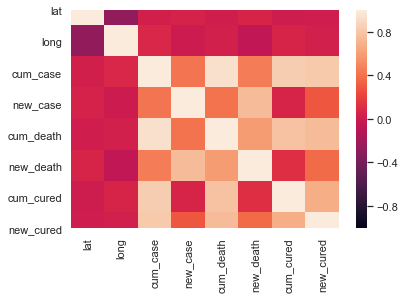

In [96]:
# correlation matrix for the corona virus
g_corr=sns.heatmap(corr,vmin=-1,vmax=1)

cum_case: has a correlation of 1 with cum_death and cum_cured  which means they are highly postitively related.
new_case: has a correlation of 1 with new_death and new_cured which means they are highly positively related if one increases the other two also increase.

In [97]:
gb=final_merge.groupby('location').mean()
gb

,lat,long,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
location,,,,,,,,
Afghanistan,33.0000,65.0000,9.965517,1.392857,1.000000,0.000000,1.000000,0.000000
Alabama,32.3182,-86.9023,64.090909,13.300000,NaN,NaN,NaN,NaN
"Alameda County, CA",37.6017,-121.7195,1.428571,0.166667,NaN,NaN,NaN,NaN
Alaska,61.3707,-152.4044,8.272727,2.000000,NaN,NaN,NaN,NaN
Albania,41.1533,20.1683,47.533333,6.214286,1.461538,0.083333,2.000000,0.000000
...,...,...,...,...,...,...,...,...
"Yolo County, CA",38.7646,-121.9018,1.000000,0.000000,NaN,NaN,NaN,NaN
Yunnan,24.9740,101.4870,142.161290,2.868852,1.970588,0.030303,106.150943,3.288462
Zambia,-15.4167,28.2833,2.333333,0.200000,NaN,NaN,NaN,NaN


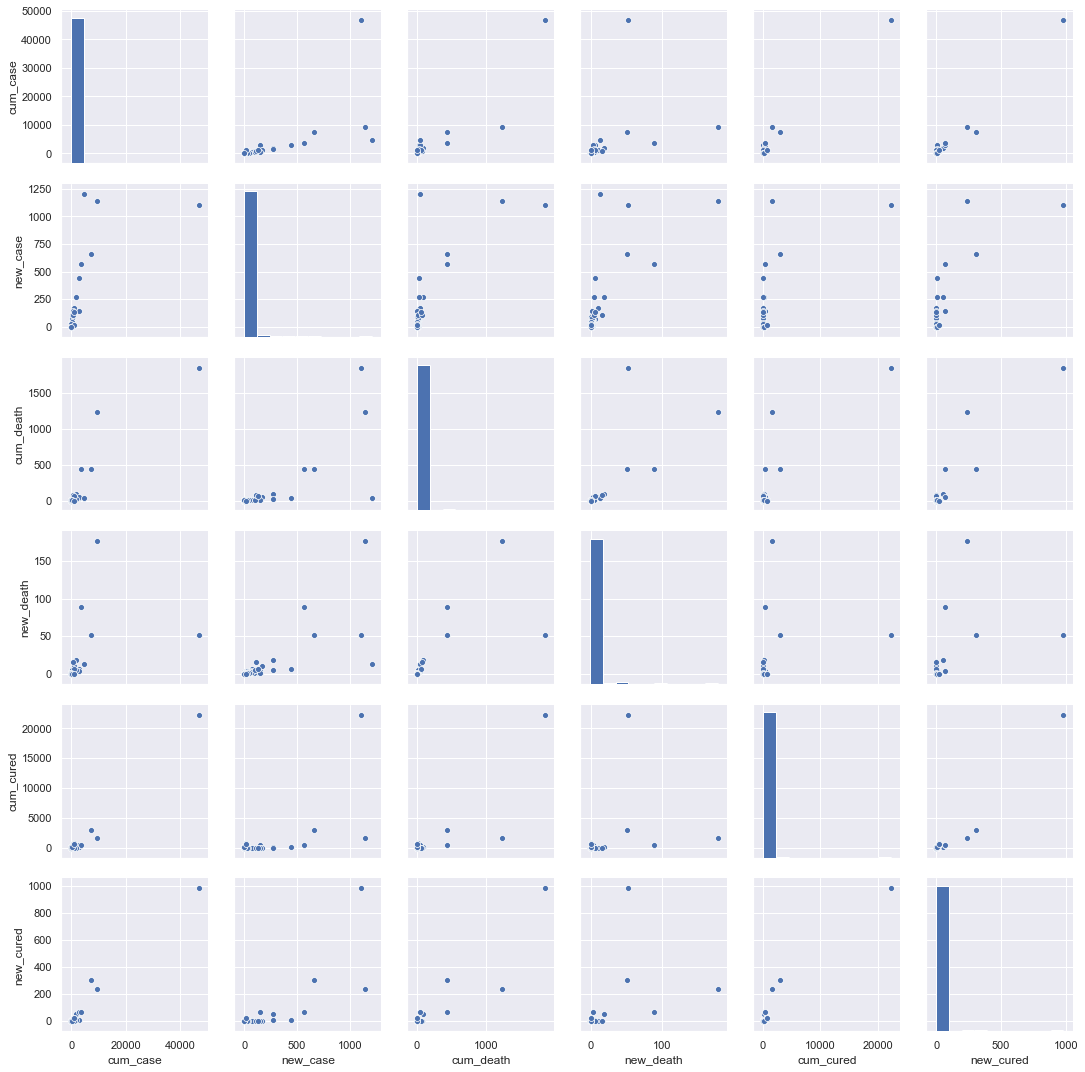

In [98]:
#  pair plot for colums 'cum_case','new_case', 'cum_death','new_death', 'cum_cured','new_cured'
g = sns.pairplot(gb[['cum_case','new_case', 'cum_death','new_death', 'cum_cured','new_cured']])
g

In [111]:
# The larges 100 cumulative cases 
nc = final_merge.nlargest(100,'cum_case')



,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
3784,Hubei,Hubei,China,30.9756,112.2707,2020-03-18,67800.0,1.0,3122.0,11.0,56927.0,924.0
3785,Hubei,Hubei,China,30.9756,112.2707,2020-03-19,67800.0,0.0,3130.0,8.0,57682.0,755.0
3786,Hubei,Hubei,China,30.9756,112.2707,2020-03-20,67800.0,0.0,3133.0,3.0,58382.0,700.0
3787,Hubei,Hubei,China,30.9756,112.2707,2020-03-21,67800.0,0.0,3139.0,6.0,58946.0,564.0
3788,Hubei,Hubei,China,30.9756,112.2707,2020-03-22,67800.0,0.0,3144.0,5.0,59433.0,487.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,France,France,France,46.2276,2.2137,2020-03-19,10871.0,1828.0,243.0,95.0,12.0,0.0
958,Italy,NaN,Italy,43.0000,12.0000,2020-03-10,10149.0,977.0,631.0,168.0,724.0,0.0
3812,Iran,NaN,Iran,32.0000,53.0000,2020-03-12,10075.0,1075.0,429.0,75.0,2959.0,0.0
1069,Spain,NaN,Spain,40.0000,-4.0000,2020-03-16,9942.0,2144.0,342.0,53.0,530.0,13.0


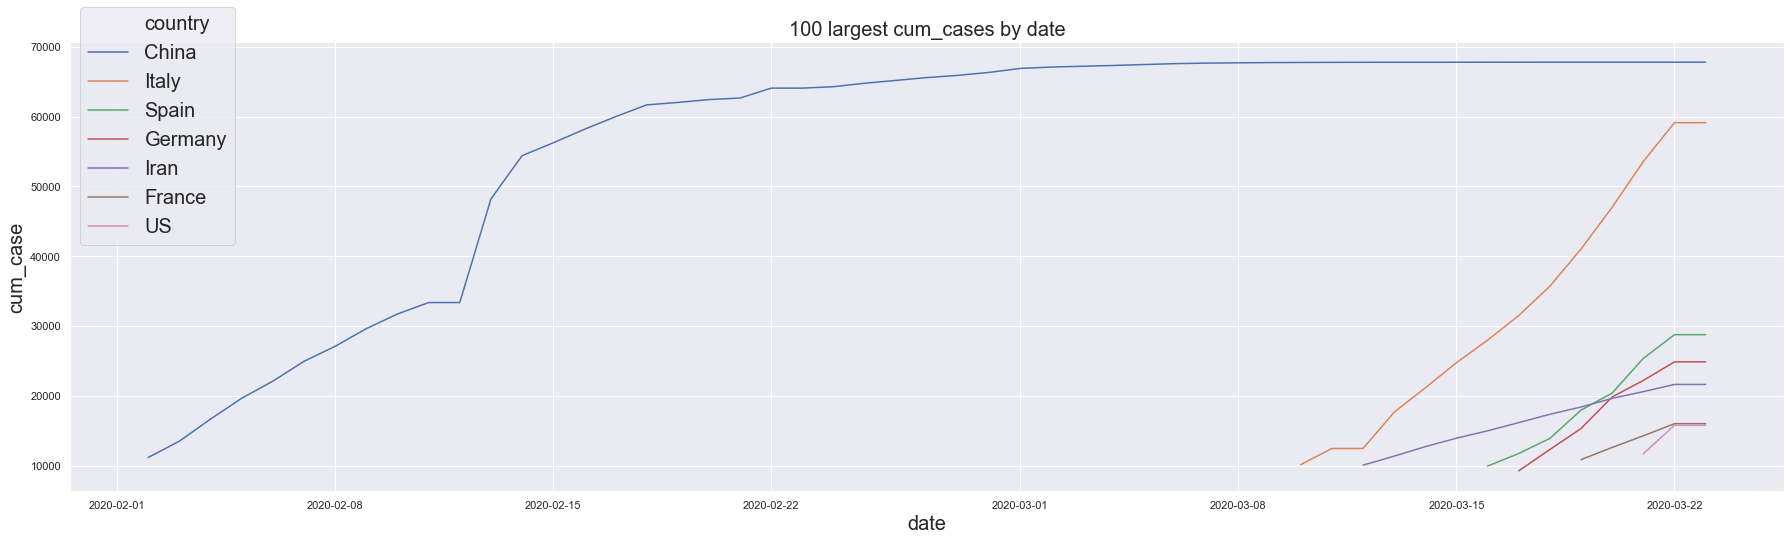

In [140]:
# line plot for the largest 100 cumulative cases by date
g = sns.lineplot(x='date', y='cum_case', hue='country', data=nc)
sns.set(rc={'figure.figsize':(30.7,8.27)})

g.set_title('100 largest cum_cases by date',fontsize=20)
g.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
g.set_xlabel('date',fontsize=20);
g.set_ylabel('cum_case',fontsize=20);

largest 100 cum_cases  during the time January 2020 to this date(March 8,2020) has been recorded in 7 countries china ,Italy,Iran,kore South,France,Spain,Germany.Currently the confirmed rate for china has deacreased from 60,000+ to 30,00+ as of the begining of march  and continuing at the same level while the other countries are increasing confirmed cases , Italy  is increasing the confirmed case in a rapid phase during.

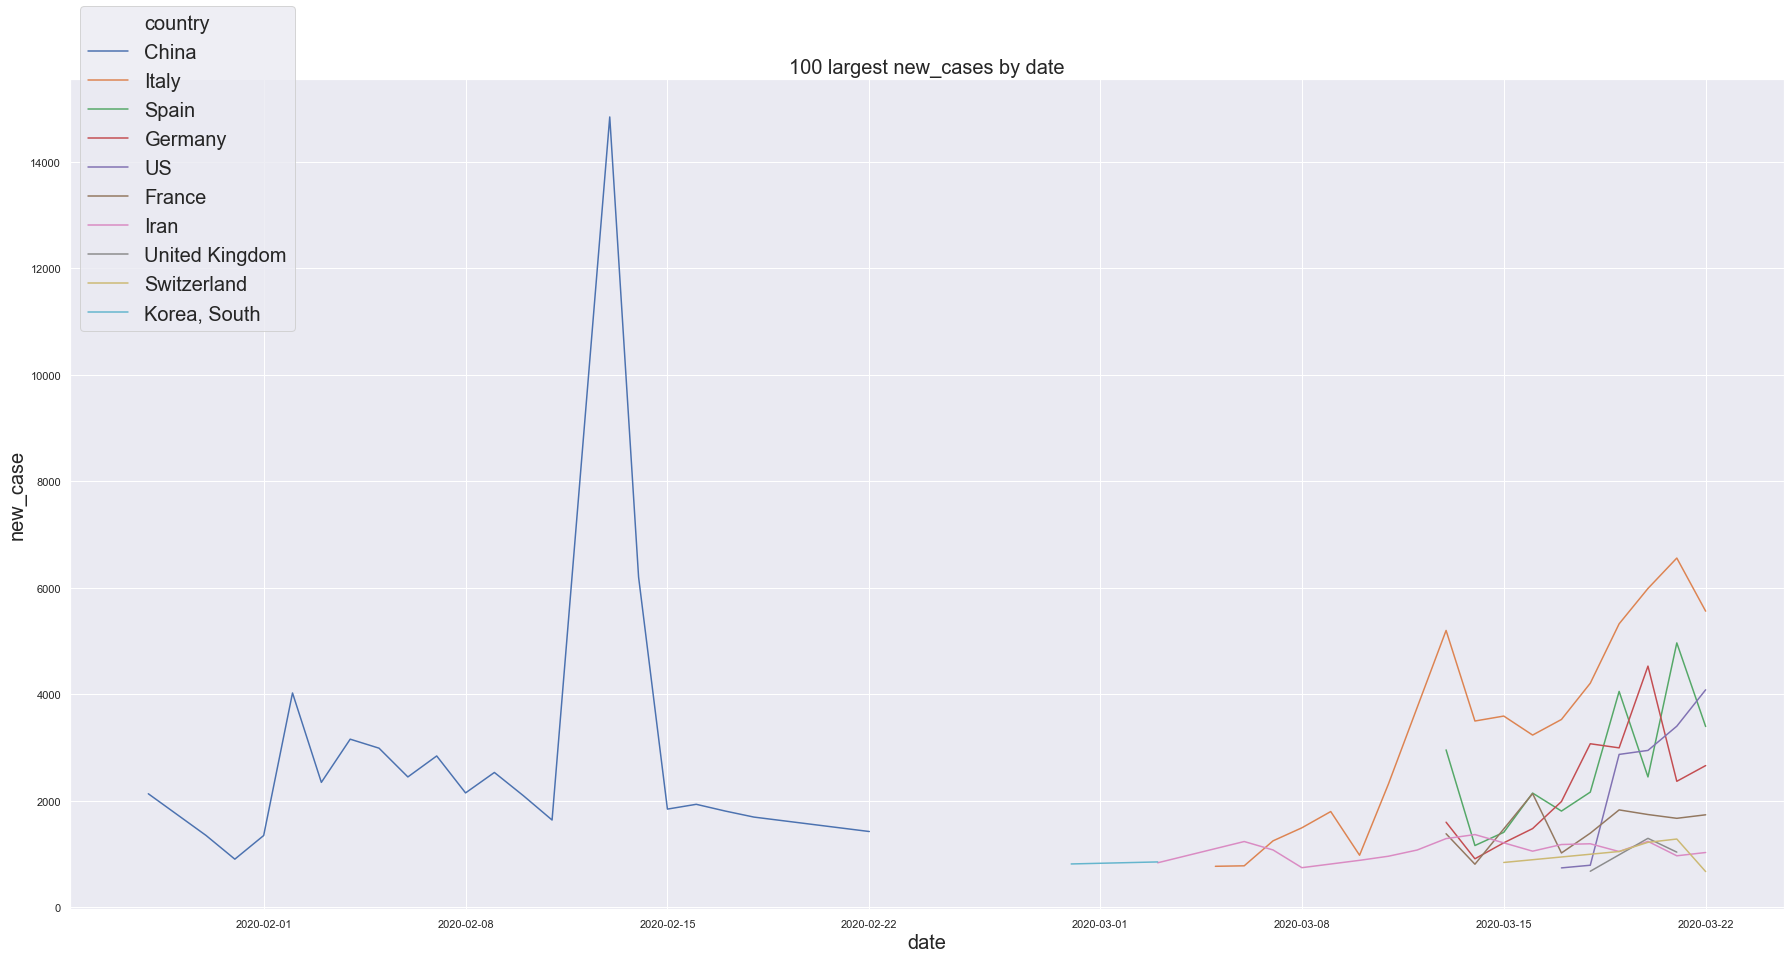

In [135]:
# line plot for the largest 100 new cases by date
newc = final_merge.nlargest(100,'new_case')
g = sns.lineplot(x='date', y='new_case', hue='country', data=newc)
sns.set(rc={'figure.figsize':(30.7,15.27)})

g.set_title('100 largest new_cases by date',fontsize=20)
g.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
g.set_xlabel('date',fontsize=20);
g.set_ylabel('new_case',fontsize=20);

largest 100 new cases during the time January 2020 to this date(March 22,2020) has been recorded in 7 countries china,Italy,Spain,Germany,US,France,Iran,UnitedKingdom,Swizerland,kore South .Currently the confirmed rate for china has deacreased from 60,000+ to 30,00+ as of the begining of march and at this date it has no new recorded cases while the other countries are having increasing confirmed cases , Italy is the leading countryi in a rapid inreasement at this time.

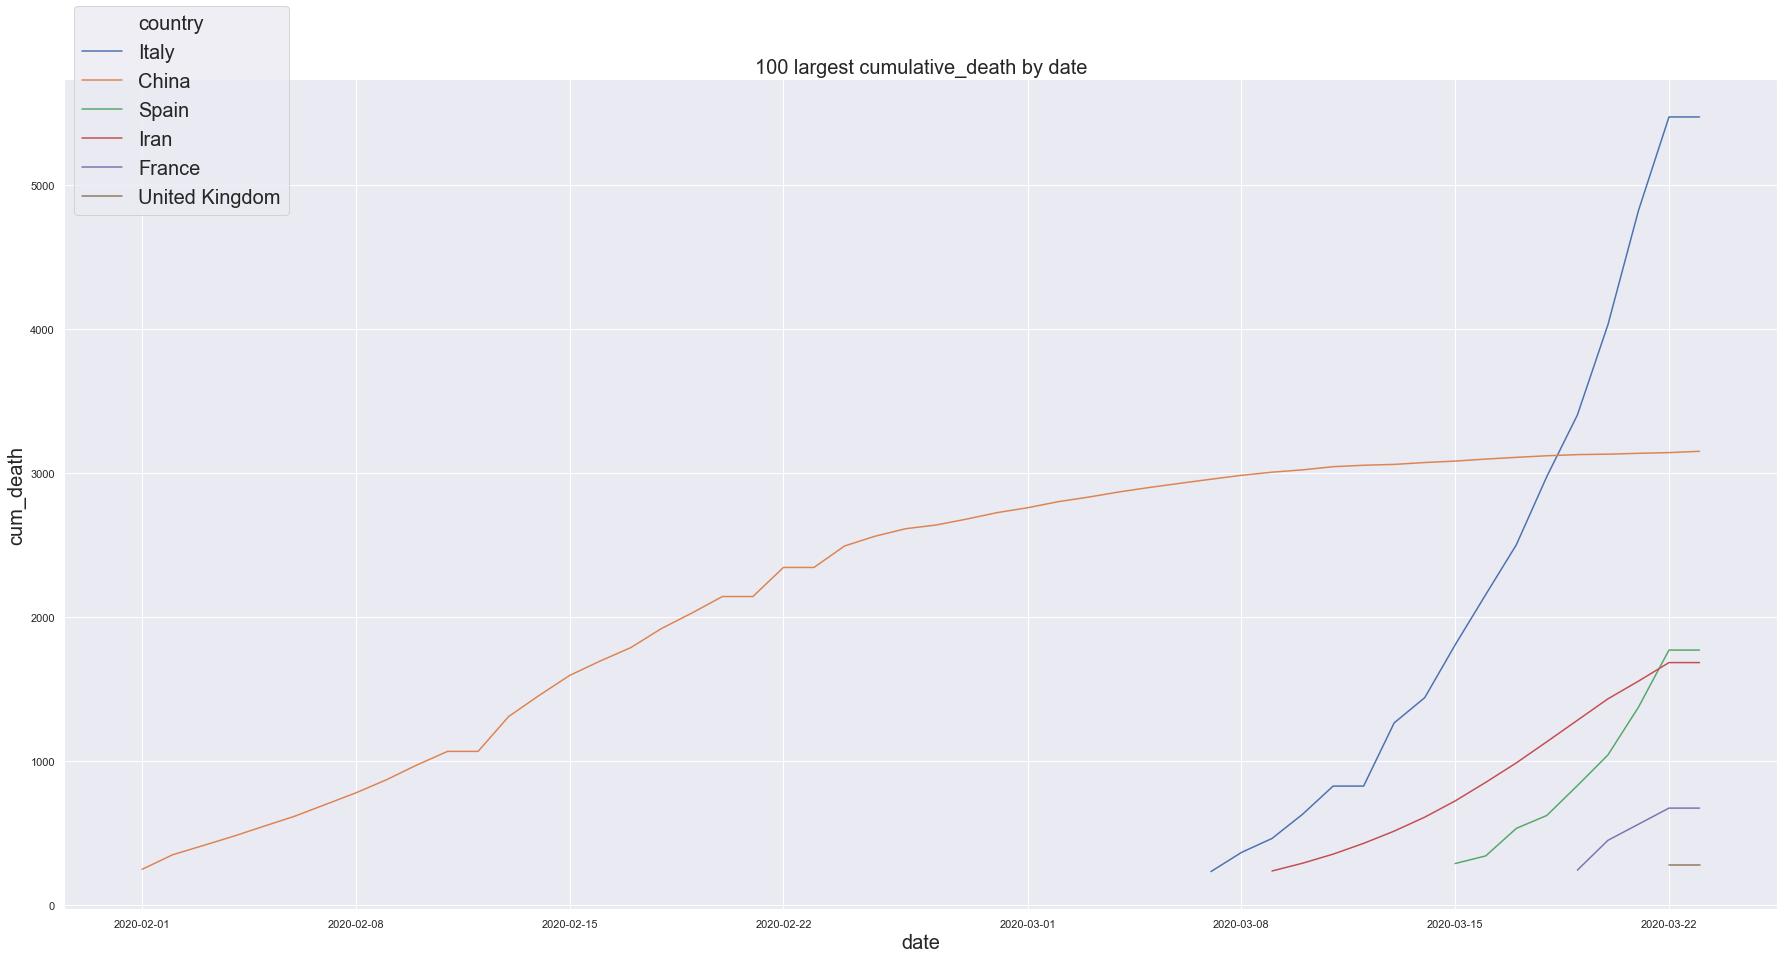

In [137]:
# line plot for the largest 100 cumulativedeathes by date
cumd = final_merge.nlargest(100,'cum_death')
cmd = sns.lineplot(x='date', y='cum_death', hue='country', data=cumd)
sns.set(rc={'figure.figsize':(30.7,15.27)})

cmd.set_title('100 largest cumulative_death by date',fontsize=20)

cmd.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
cmd.set_xlabel('date',fontsize=20);
cmd.set_ylabel('cum_death',fontsize=20);

The largest 100 cumulative death by date since the out break of the corona virus  has been recorded in 6 countries. Italy,china,Spain,Iran,France,,UnitedKingdom. Italy is the leading countryi in cumulative deathes nearly 6000 people have died followed by china  over 3000 people  died since the out break.Spain is the 3rd on the rank with around 2000 deaths since the out break.

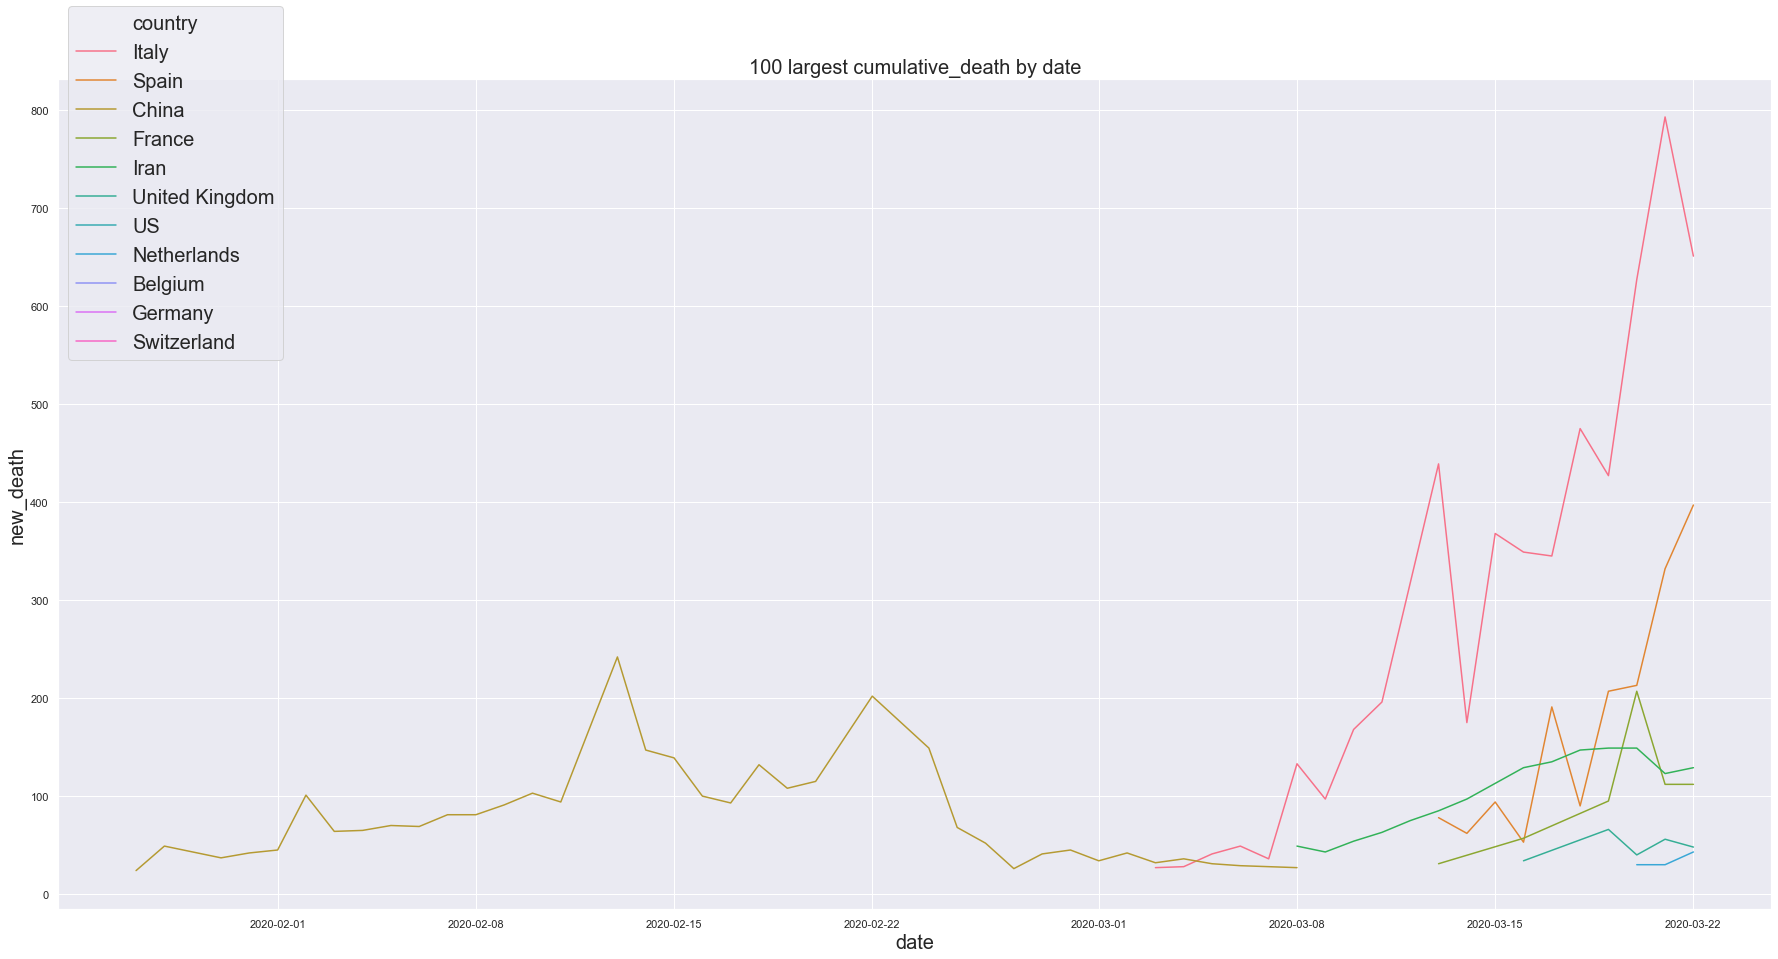

In [138]:
# line plot for the largest 100 cumulative deathes by date
nwd = final_merge.nlargest(100,'new_death')
nd = sns.lineplot(x='date', y='new_death', hue='country', data=nwd)
sns.set(rc={'figure.figsize':(30.7,15.27)})

nd.set_title('100 largest new_death by date',fontsize=20)

nd.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
nd.set_xlabel('date',fontsize=20);
nd.set_ylabel('new_death',fontsize=20);

Italy is the leading country for the highest with around 800 deaths on a single date. 

Text(0.5, 1.0, '100 largest cum_cases by country')

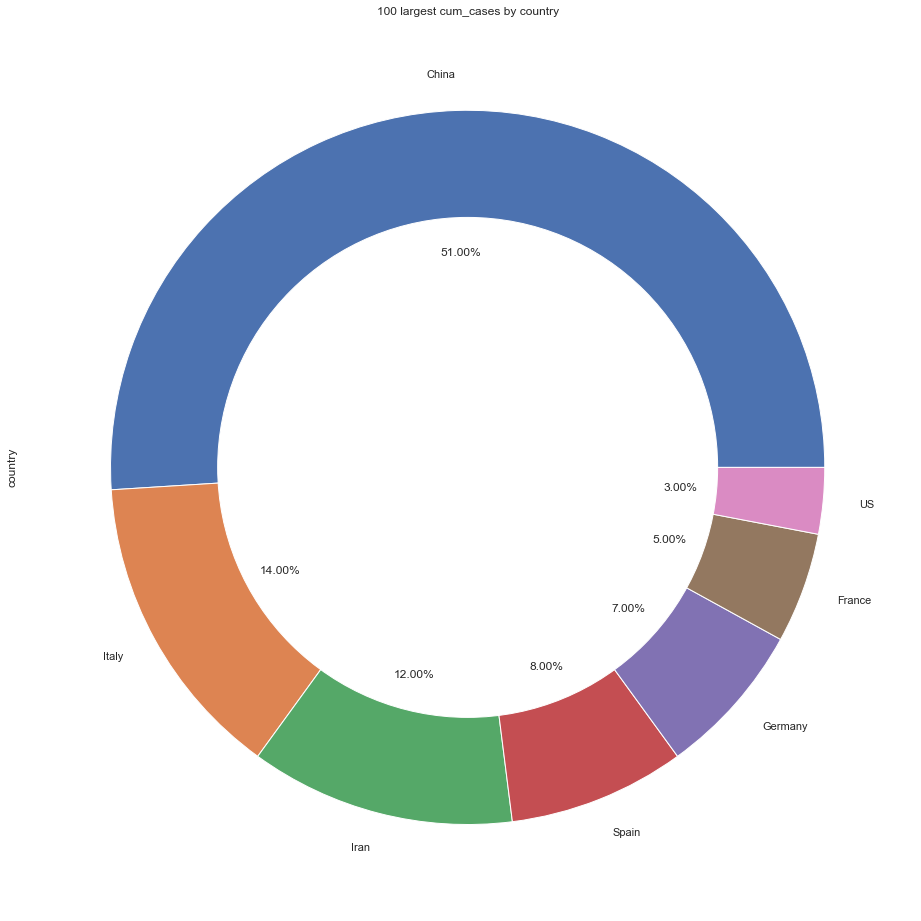

In [130]:
# pi chart for 100 largest cum_cases by country
ax = nc.country.value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(16,20))
add_circle = plt.Circle((0,0),0.7,color='white')
fig=plt.gcf()
fig.gca().add_artist(add_circle)
ax.set_title('100 largest cum_cases by country')

The pie chart shows that out of 100 largest cumulative_case recorded betweed January and March 8, 2020, 78 percent is from china the next largest record are from Italy and Korea.

Text(0.5, 1.0, "Italy's cumilative cases by date")

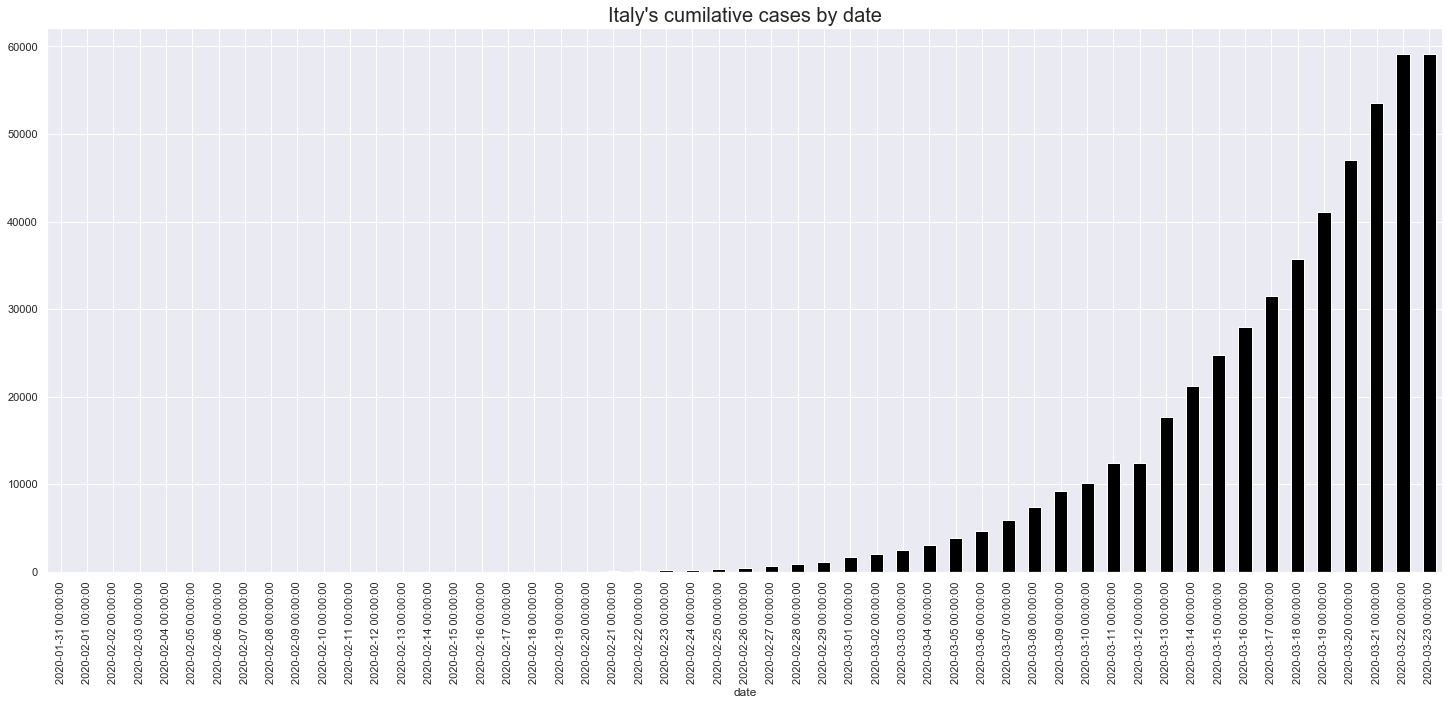

In [102]:
# Italy\'s cumilative cases by date
it = final_merge[final_merge['country'] == 'Italy']
gb = it.groupby('date').max()
fig, ax = plt.subplots(figsize=(25,10))
colors = plt.cm.flag(it.cum_case.values)

g= gb.cum_case.plot(kind='bar', rot=90, color=colors,ax=ax)


g.set_title('Italy\'s cumilative cases by date',fontsize=(20))

The graph shows that only in March aproximately 1000  of people gets the virus every day and spreading rapidly.

In [103]:
gb = it.groupby('date').max()
gb

,location,prov_state,country,lat,long,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
date,,,,,,,,,,,
2020-01-31,Italy,NaN,Italy,43.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN
2020-02-01,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-02,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-03,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-04,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-05,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-06,Italy,NaN,Italy,43.0,12.0,2.0,0.0,NaN,NaN,NaN,NaN
2020-02-07,Italy,NaN,Italy,43.0,12.0,3.0,1.0,NaN,NaN,NaN,NaN
2020-02-08,Italy,NaN,Italy,43.0,12.0,3.0,0.0,NaN,NaN,NaN,NaN


[Text(0, 0, 'others'), Text(0, 0, 'Italy')]

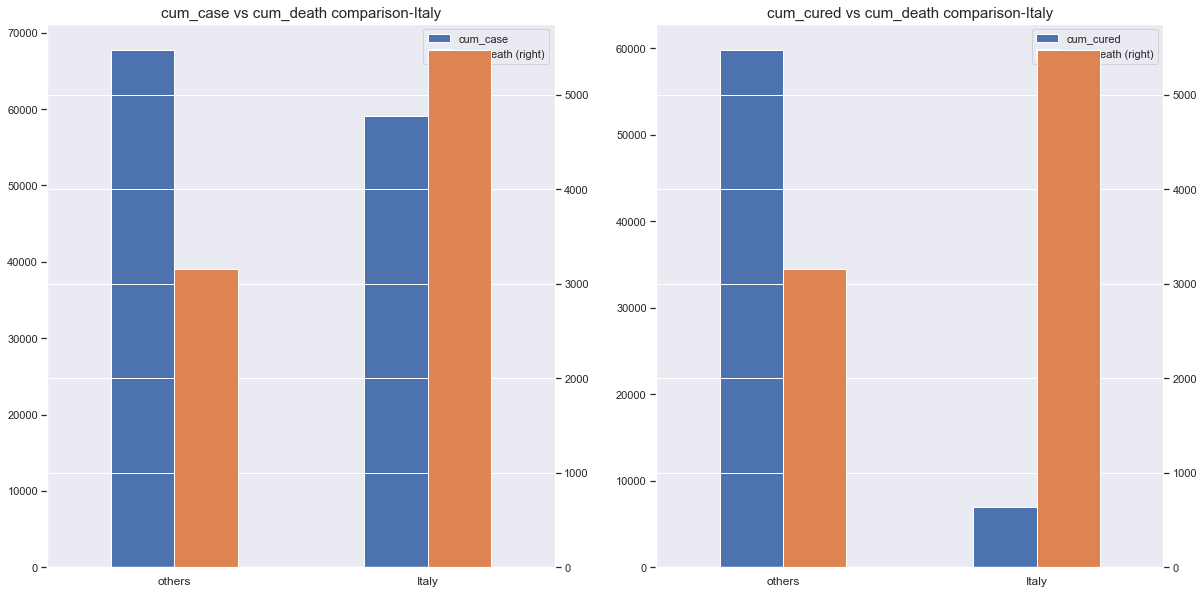

In [150]:
it = final_merge.groupby(final_merge.country == 'Italy').max()
fig, ax = plt.subplots(1,2,figsize=(20,10))
case_cured = it.plot(kind='bar', y=['cum_case', 'cum_death'], secondary_y='cum_death', rot=0,ax=ax[0])


case_cured.set_title('cum_case vs cum_death comparison-Italy vs others', fontsize=15)
case_cured.set_xlabel('')
case_cured.set_xticklabels(['others','Italy'], {'fontsize':12})

case_death= it.plot(kind='bar', y=['cum_cured', 'cum_death'], secondary_y='cum_death',  rot=0,ax=ax[1])
case_death.set_title('cum_cured vs cum_death comparison-Italy vs others', fontsize=15)
case_death.set_xlabel('')
case_death.set_xticklabels(['others','Italy'], {'fontsize':12})


cum_case vs cum_death comparison-Italy graph shows in Italy the cumulative  cases are around 60,000 out of that, around 6000 people died (10%).Italy's death rate is much higher than the other countries all together on average(death rate is around 5% on average) at this time.

cum_cured vs cum_death comparison-Italy graph shows that cured rate(11%) is not that much higher than the  death rate(10%).

Text(0.5, 1.0, 'frequency of cases in each country')

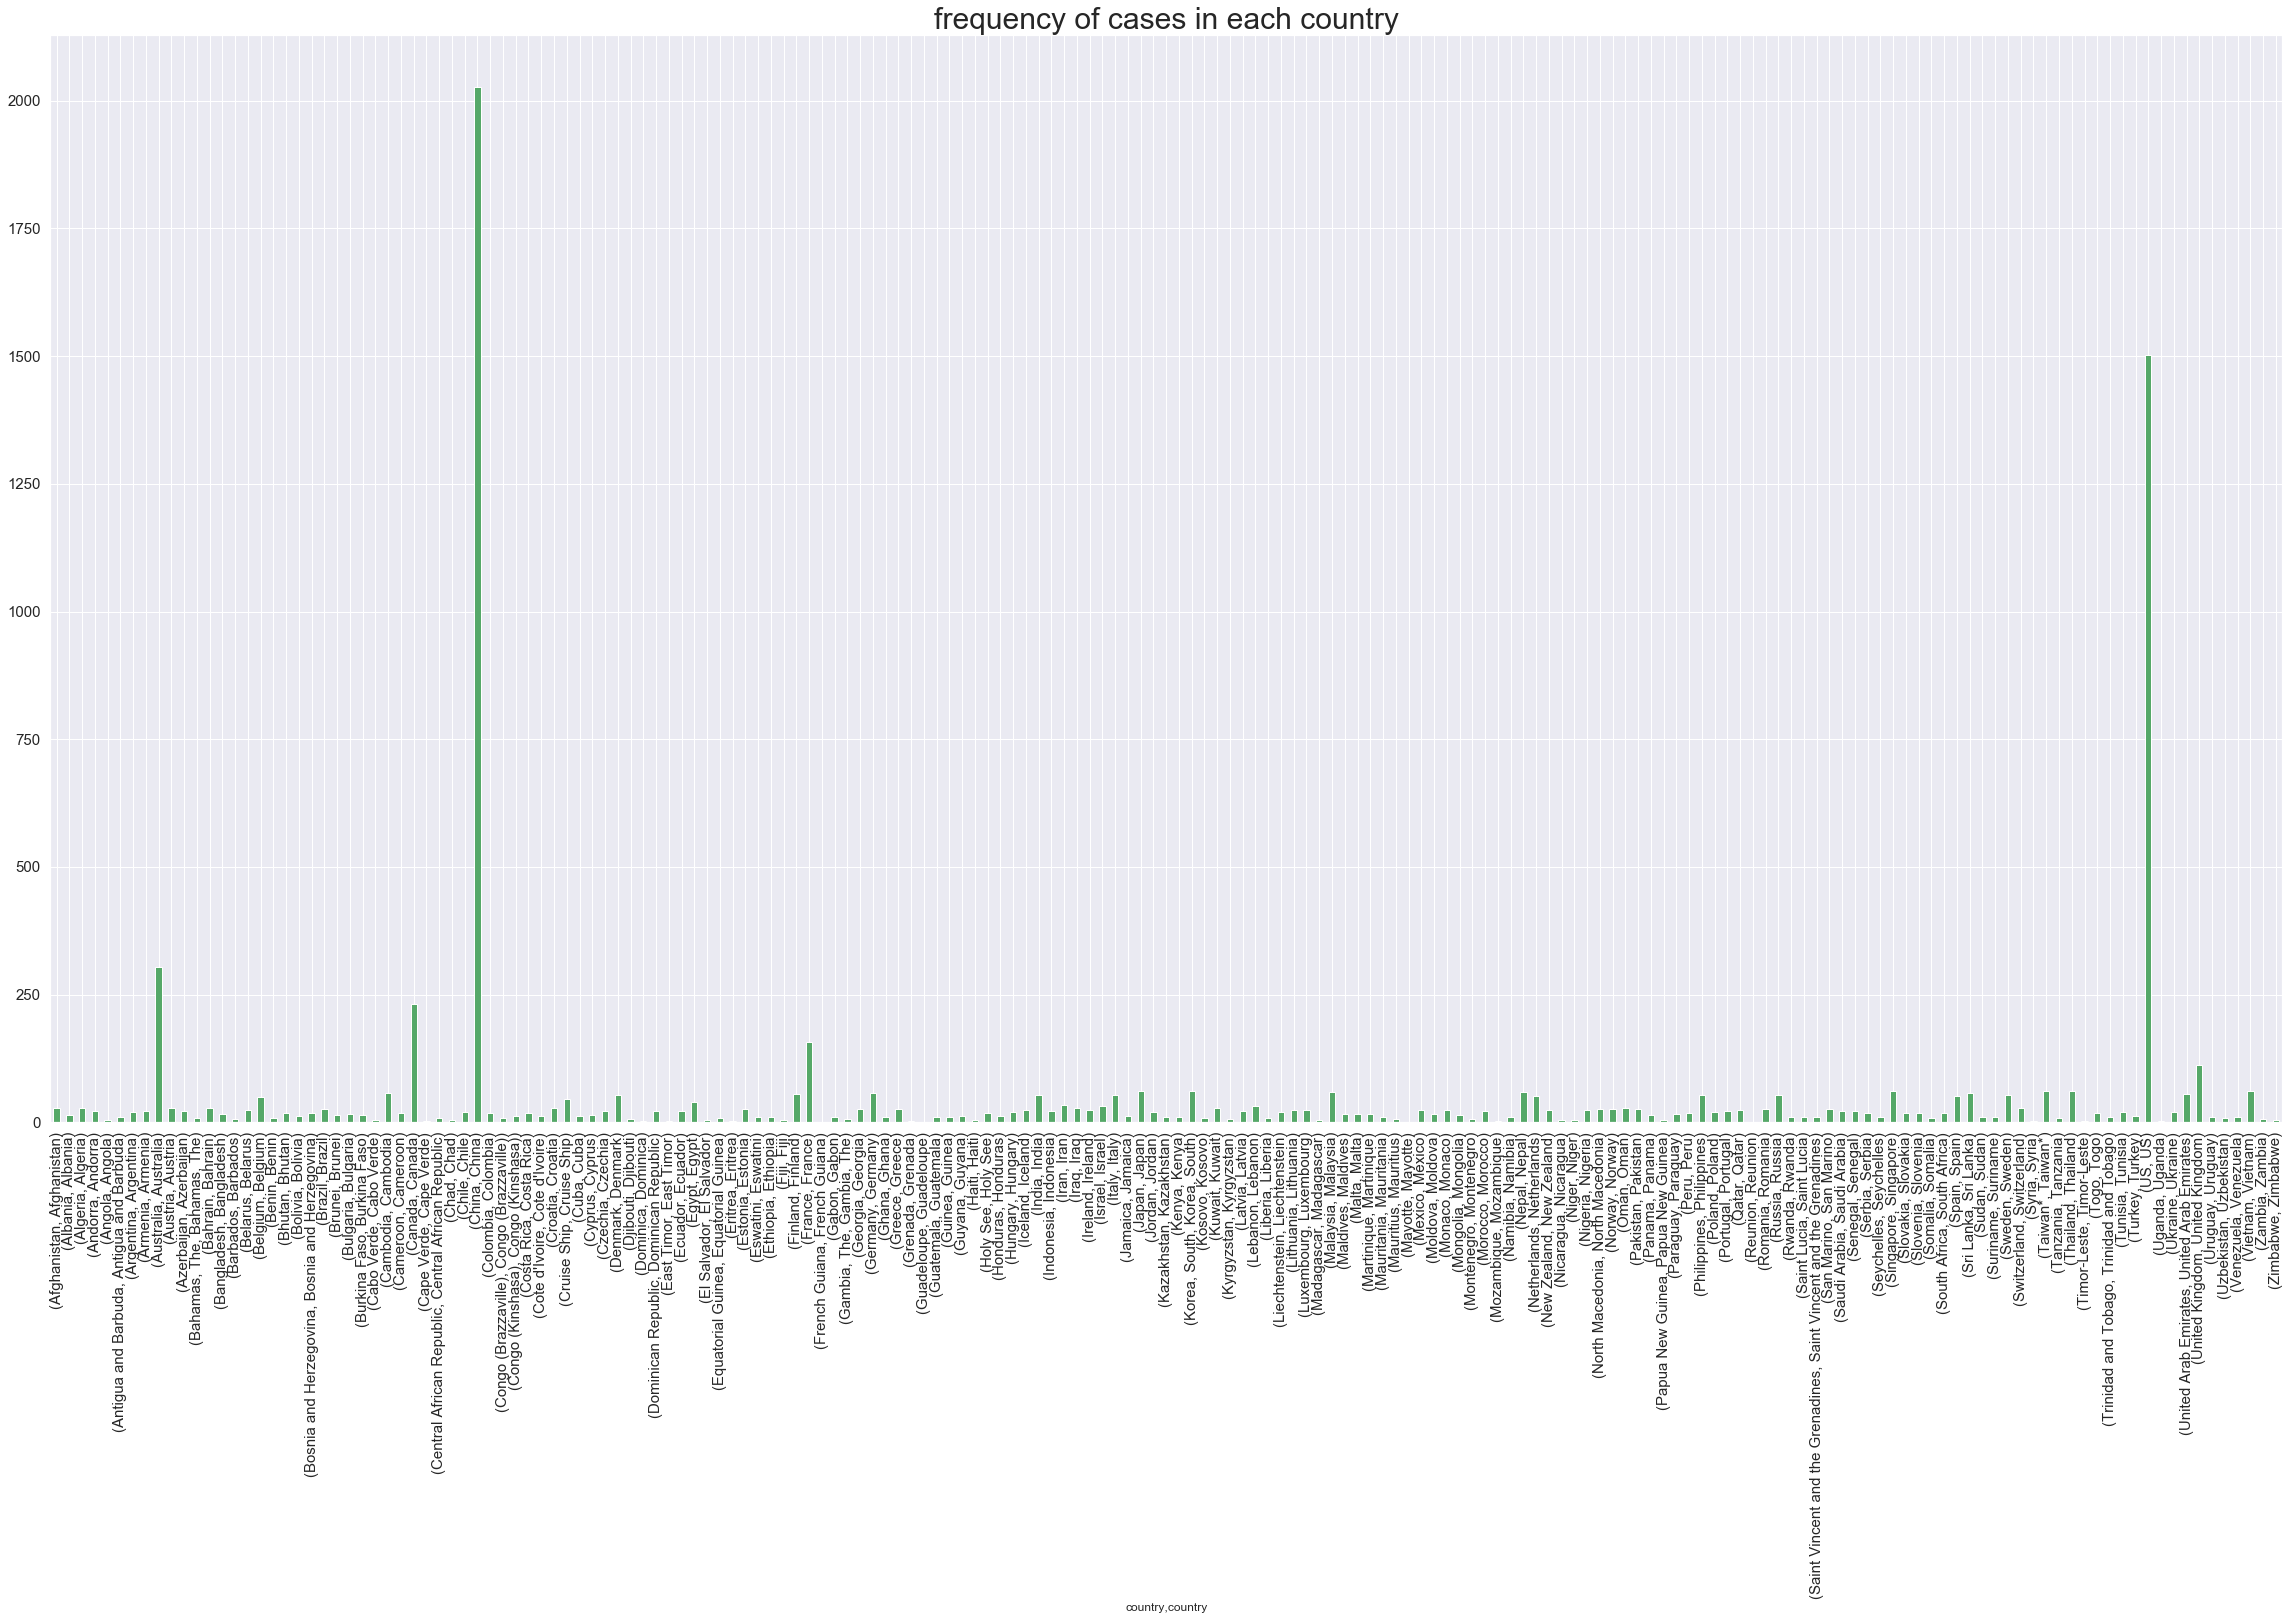

In [155]:
# frequency of cases in each country
gb=final_merge.groupby('country')
fig, ax = plt.subplots(figsize=(40,20))
countries = gb.country.value_counts().plot(kind='bar', rot=90, color='g',ax=ax,fontsize=(15))

countries.set_title('frequency of cases in each country',fontsize=(30))

Text(0.5, 1.0, 'Number of cumulative_case,cum_death,new_case vs date -USA')

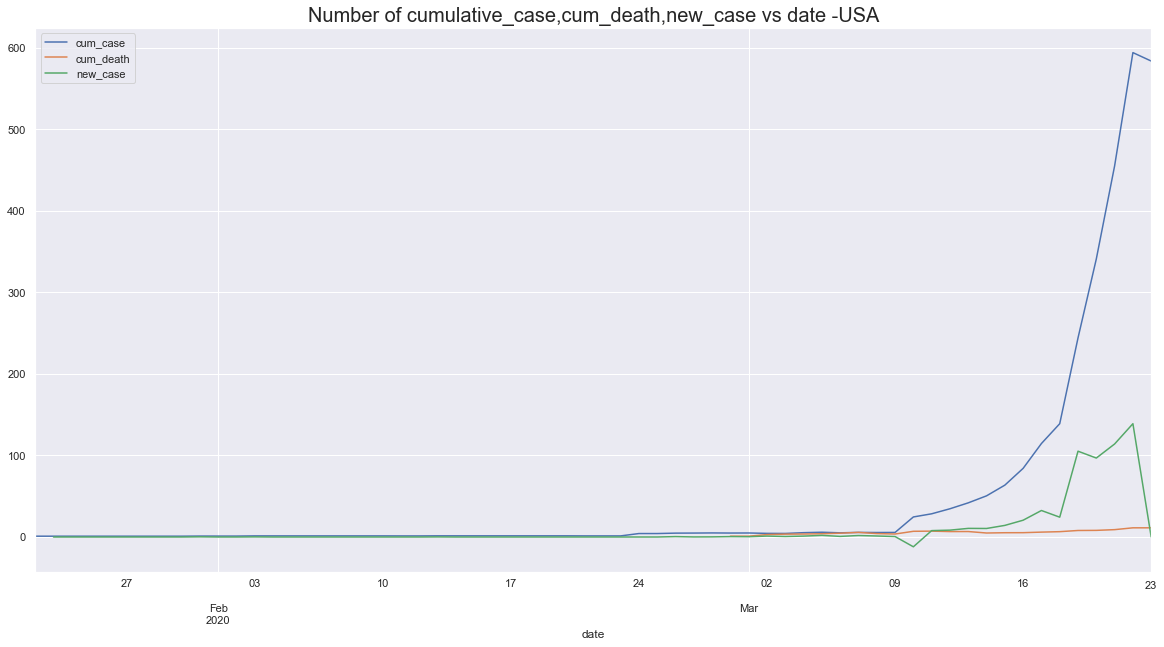

In [147]:
# Number of cumulative_case,cum_death,new_case vs date -USA
gb=final_merge[(final_merge['country'] == 'US')]
locat=gb.groupby('date').mean()
lo=locat.plot(kind ='line', y=['cum_case','cum_death','new_case'], figsize=(20,10))
lo.set_title('Number of cumulative_case,cum_death,new_case vs date -USA',fontsize=(20))



Text(0.5, 1.0, 'cum_case,new_case,cum_death,cum_cured in  finland by date')

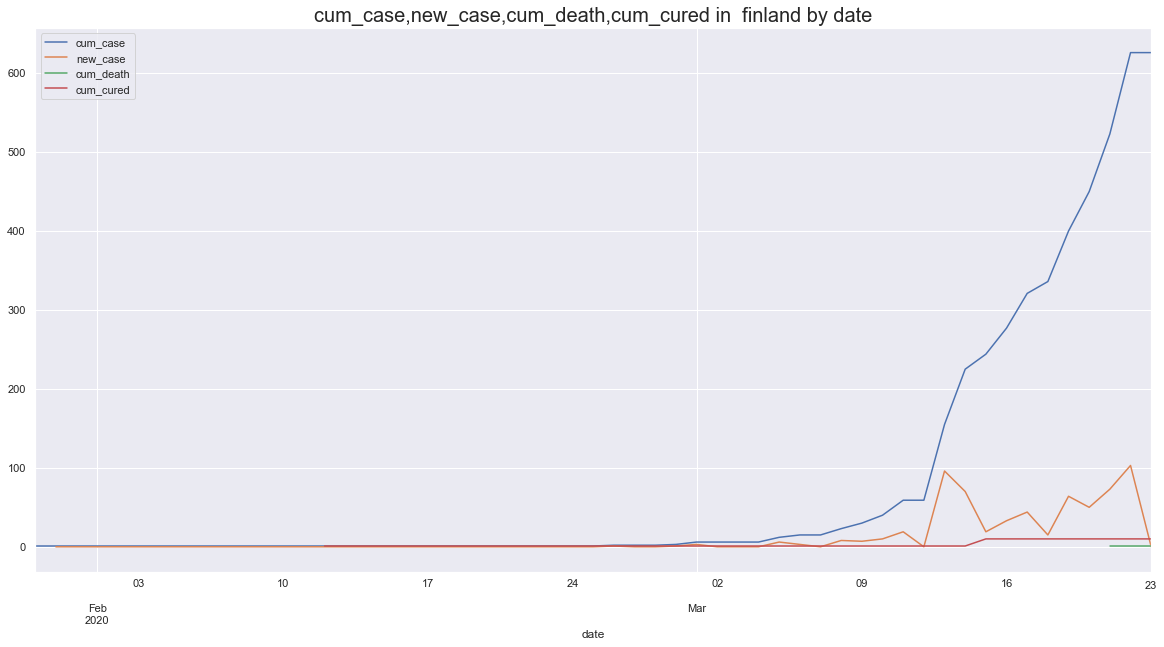

In [107]:
# cum_case,new_case,cum_death,cum_cured in  finland by date
gbf=final_merge[(final_merge['country'] == 'Finland')]

fg=gbf.plot(kind ='line',x='date', y=['cum_case','new_case','cum_death','cum_cured'], figsize=(20,10))

fg.set_title('cum_case,new_case,cum_death,cum_cured in  finland by date',fontsize=(20))



The above graph shows that  the virus is spreading rapidly.

Text(0.5, 1.0, 'maximum cum_case by countries')

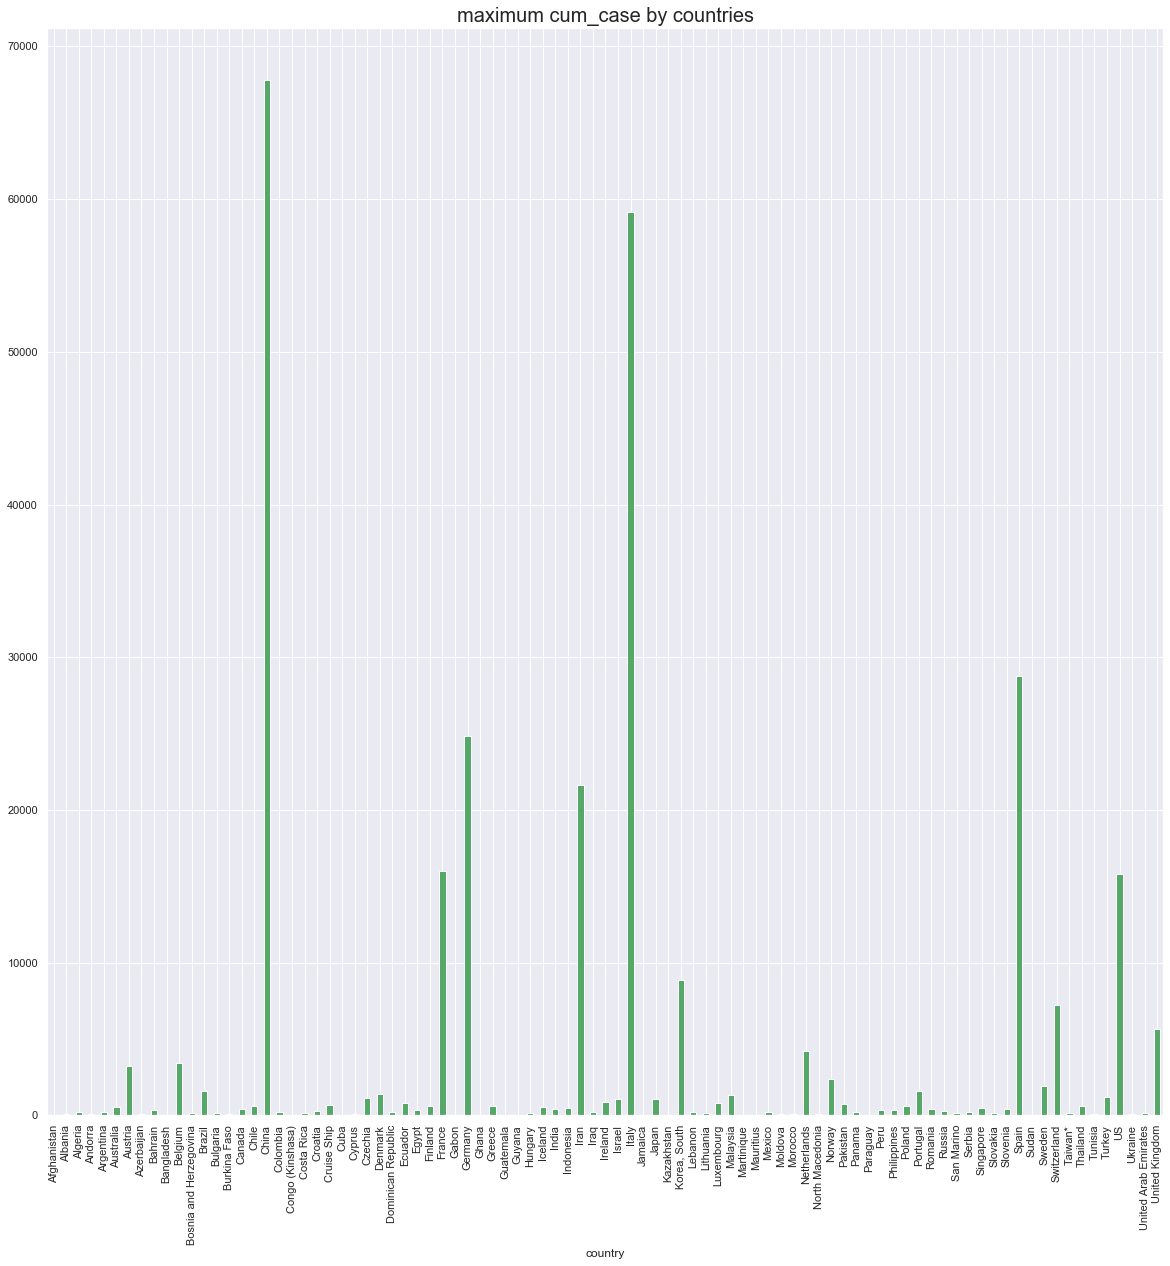

In [160]:
cum_d=final_merge[final_merge['cum_death']>0]

x=cum_d.groupby('country').max()


fig, ax = plt.subplots(figsize=(20,20))
maxcum_case = x.cum_case.plot(kind='bar', color='g',ax=ax)
maxcum_case.set_title('maximum cum_case by countries',fontsize=(20))



Text(0.5, 1.0, 'Maximum cum_death by country')

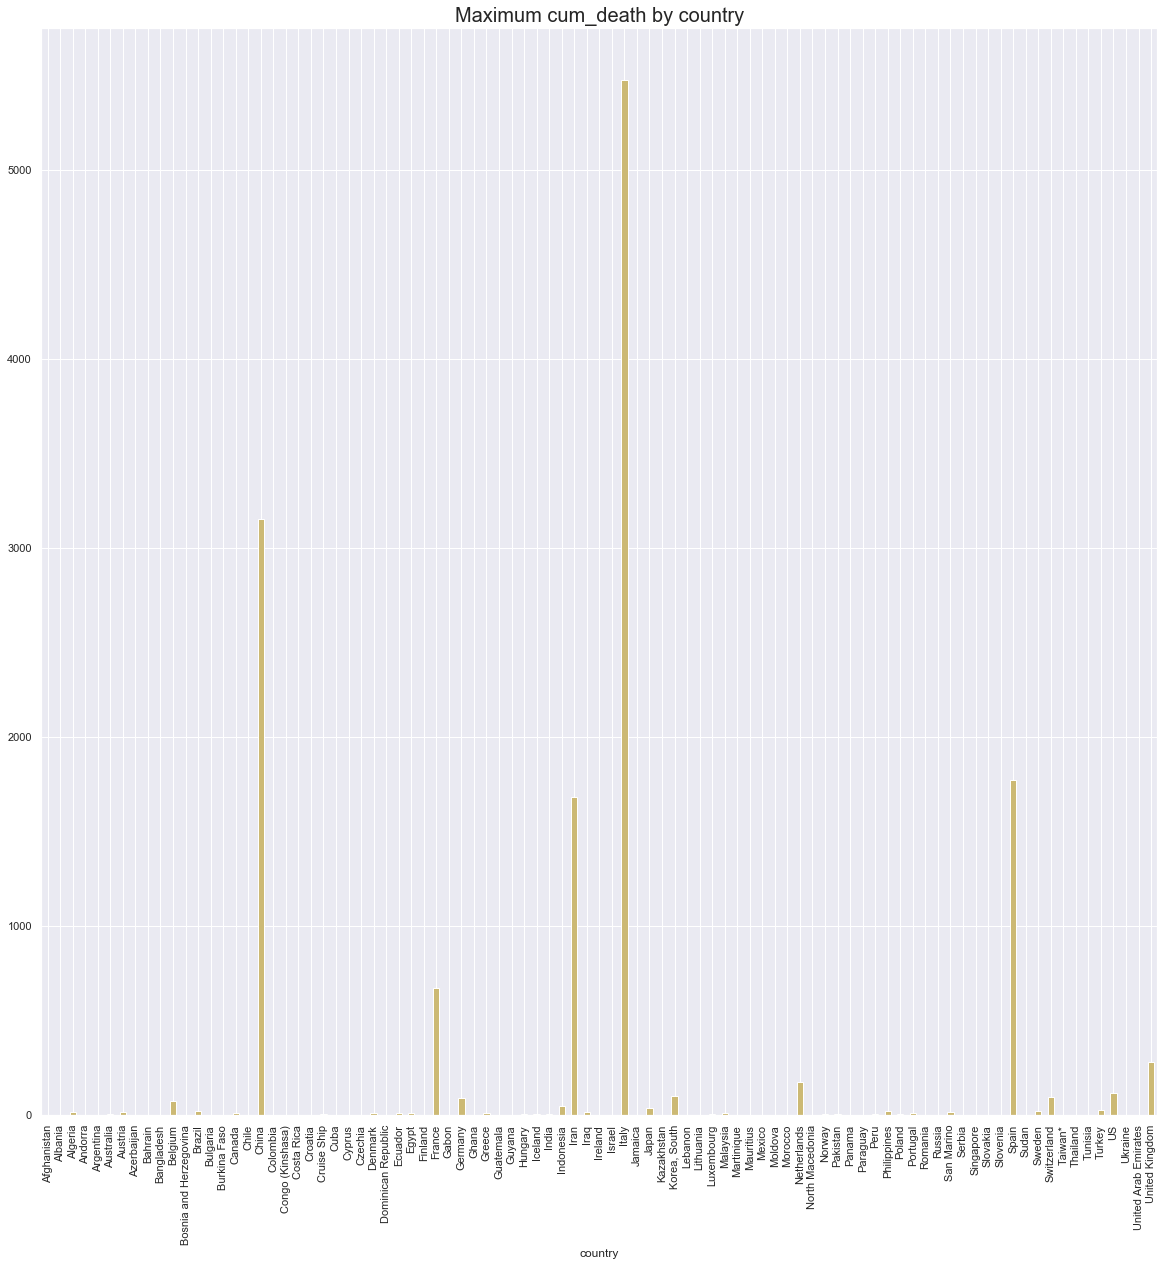

In [159]:
cum_d=final_merge[final_merge['cum_death']>0]

x=cum_d.groupby('country').max()


fig, ax = plt.subplots(figsize=(20,20))

maxcum_death = x.cum_death.plot(kind='bar', color='y',ax=ax)
maxcum_death.set_title('Maximum cum_death by country',fontsize=(20))

Text(0.5, 1.0, 'comparison of cum_case, new_case ,cum_death ,cum_cured in china')

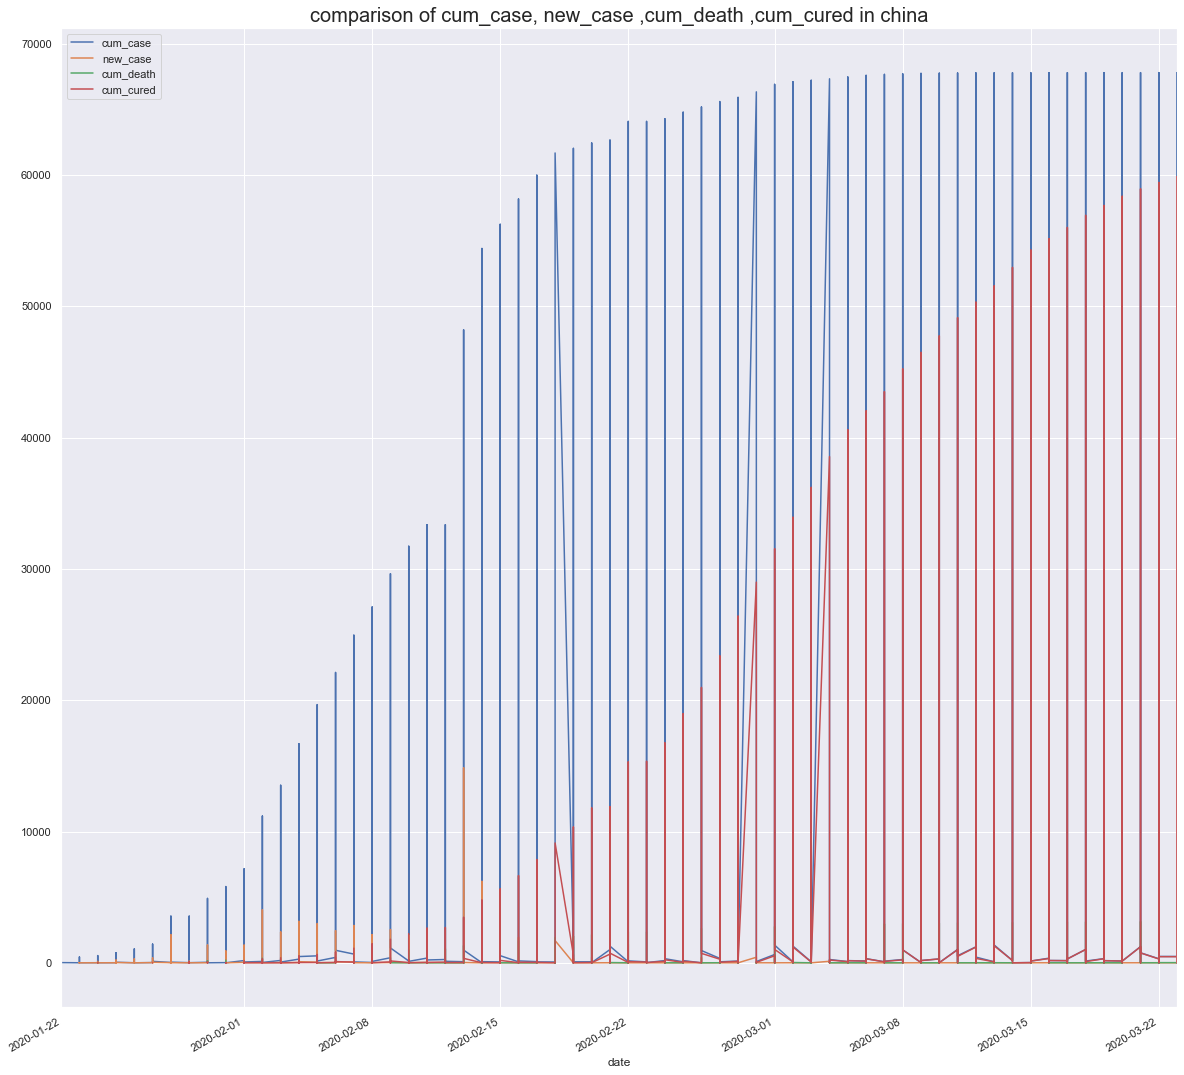

In [109]:
gbf=final_merge[(final_merge['country'] == 'China')]

k=gbf.plot(kind ='line',x='date', y=['cum_case','new_case','cum_death','cum_cured'], figsize=(20,20))
k.set_title('comparison of cum_case, new_case ,cum_death ,cum_cured in china',fontsize=(20))

Text(0.5, 1.0, 'comparison of cum_case, new_case ,cum_death in these countries')

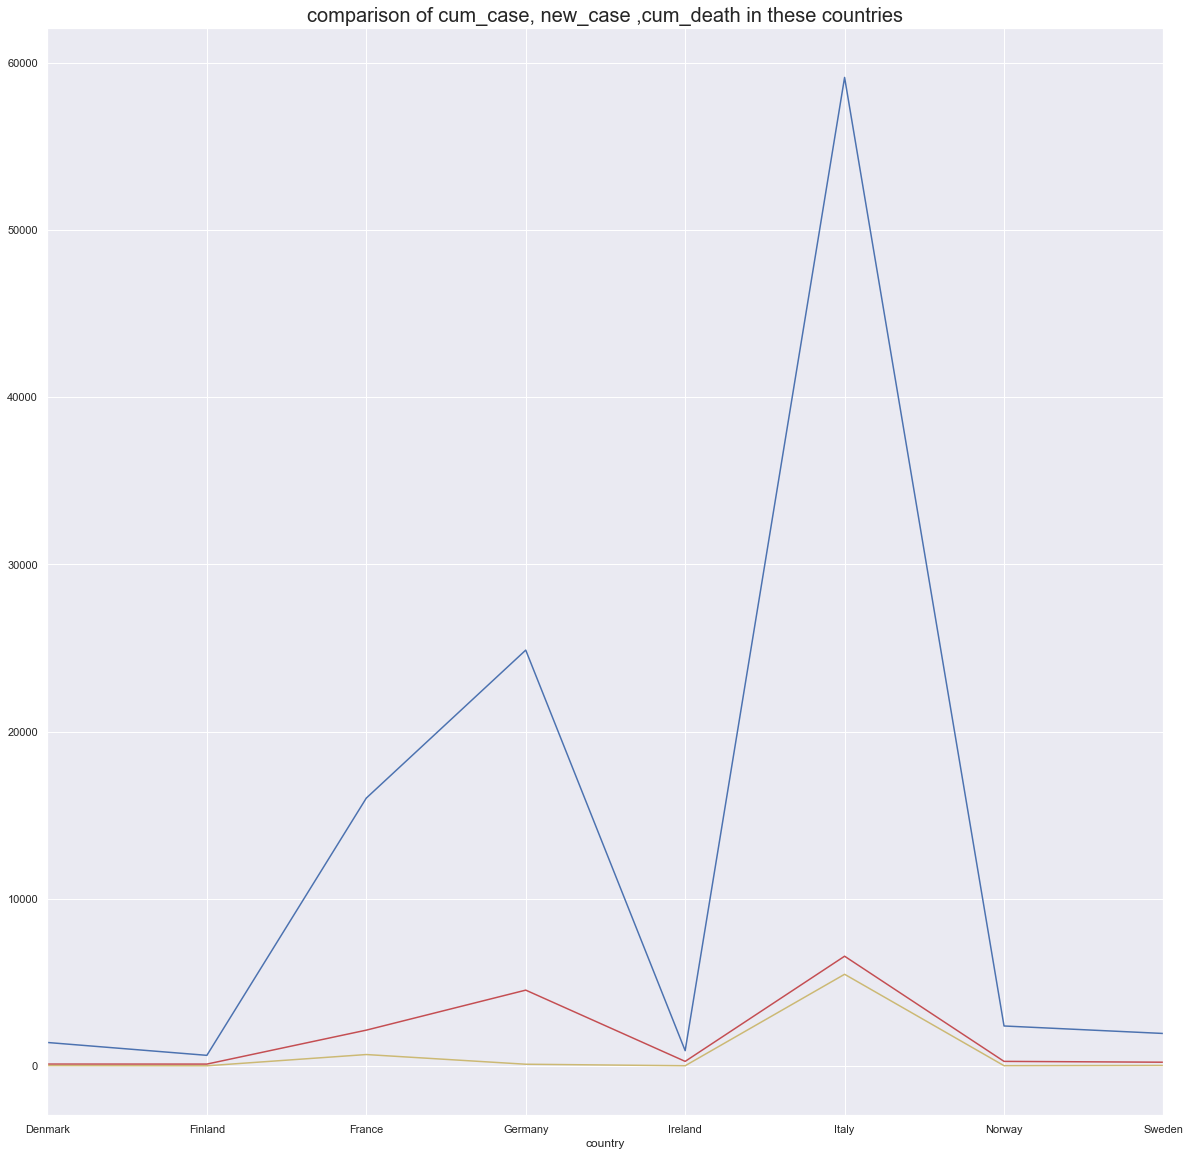

In [172]:
cc=final_merge[final_merge.country.isin(['Italy','Finland','France','Germany','UK','Denmark','Ireland','Sweden','Norway'])]
cc_d=cc[cc['cum_death']>0]

x=cc_d.groupby('country').max()


fig, ax = plt.subplots(figsize=(20,20))
maxcum_case = x.cum_case.plot(kind='line', color='b',ax=ax)
maxcum_case = x.new_case.plot(kind='line', color='r',ax=ax)
maxcum_case = x.cum_death.plot(kind='line', color='y',ax=ax)
maxcum_case.set_title('comparison of cum_case, new_case ,cum_death in these countries',fontsize=(20))
# l=cc.plot(kind ='line',x='country', y=['cum_case','new_case','cum_death','cum_cured'], figsize=(20,10))
# l.set_title('comparison of cum_case, new_case ,cum_death ,cum_cured in these countries',fontsize=(20))